In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
constructors_df = pd.read_csv('datasets/constructors.csv') # Dataframe linking each constructor (team) with an ID 
constructors_df.head(10)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


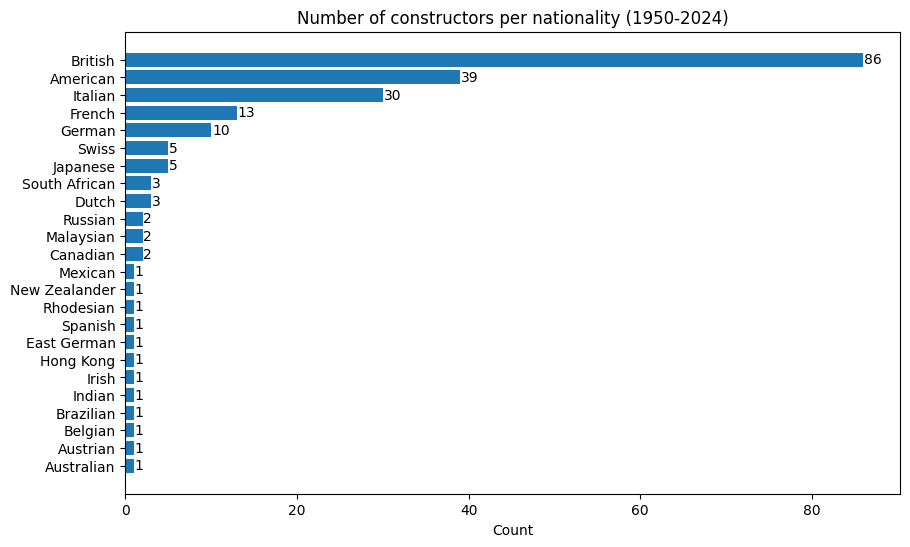

In [5]:
constructors_by_nationality_df = constructors_df.groupby('nationality').size().reset_index(name='counts') # Group teams by nationality
constructors_by_nationality_df = constructors_by_nationality_df.sort_values(by='counts', ascending=True)
counts = constructors_by_nationality_df['counts']
nationality = constructors_by_nationality_df['nationality']


plt.figure(figsize=(10, 6))
bars = plt.barh(nationality, counts)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Position text slightly beyond the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        str(int(bar.get_width())),  # Display the value
        va='center',  # Align vertically
        fontsize=10  # Font size
    )

plt.title('Number of constructors per nationality (1950-2024)')
plt.xlabel('Count')
plt.show()

In [6]:
constructor_standings_df = pd.read_csv('datasets/constructor_standings.csv')
constructor_standings_df.head(10)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
5,6,18,6,1.0,6,6,0
6,7,19,1,24.0,1,1,1
7,8,19,2,19.0,2,2,0
8,9,19,3,9.0,4,4,0
9,10,19,4,6.0,5,5,0


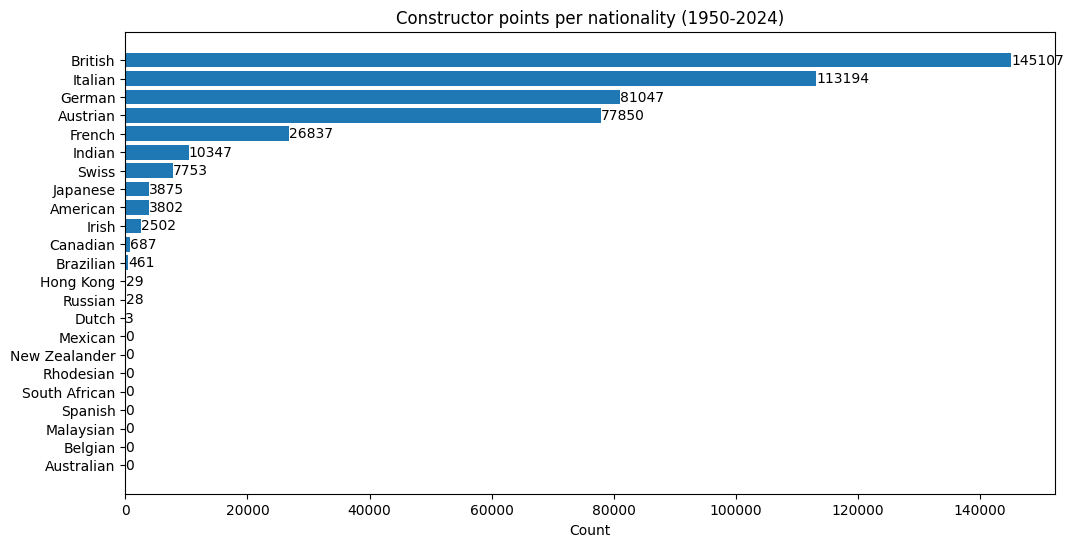

In [7]:
constructor_standings_df.drop(columns=['constructorStandingsId', 'raceId', 'position', 'positionText', 'wins'], inplace=True)
constructor_points_df = constructor_standings_df.groupby('constructorId')['points'].sum().reset_index()

nationality_constructor_df = constructors_df.copy().drop(columns=['constructorRef', 'name'])

merged_df = pd.merge(constructor_points_df, nationality_constructor_df, on='constructorId')

nationality_constructor_points_df = merged_df.groupby('nationality')['points'].sum().reset_index().sort_values(by='points', ascending=True)

nationality = nationality_constructor_points_df['nationality']
points = nationality_constructor_points_df['points']

plt.figure(figsize=(12, 6))
bars = plt.barh(nationality, points)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Position text slightly beyond the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        str(int(bar.get_width())),  # Display the value
        va='center',  # Align vertically
        fontsize=10  # Font size
    )

plt.title('Constructor points per nationality (1950-2024)')
plt.xlabel('Count')
plt.show()
